# Analysis of Malaysian Newborn Birth Data

## Introduction 
This report presents a analysis of the Malaysia New Born Baby Dataset, which contains information about births across different states, ethnicities, and time periods in Malaysia. The dataset includes variables such as state, date, sex, ethnicity, and the number of births (abs).

The analysis follows a structured approach, including data cleaning, exploratory data analysis, preprocessing, implementation of multiple machine learning algorithms, model comparison, hyperparameter tuning, and time series analysis. The primary objective is to understand patterns in birth rates and develop predictive models for the number of births.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('birth_sex_ethnic_state.csv')

In [4]:
# Understand the dataset, discovered missing value (abs)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7854 entries, 0 to 7853
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      7854 non-null   object 
 1   date       7854 non-null   object 
 2   sex        7854 non-null   object 
 3   ethnicity  7854 non-null   object 
 4   abs        7790 non-null   float64
dtypes: float64(1), object(4)
memory usage: 306.9+ KB


In [5]:
# In here i discovered it contain duplicate data, example : sex contain both and ethnicity are overall. 
# However my aim is to be determine by each gender and each ethnicity. Hence i wonder that dataset contain duplicate data.
df.head(10)

,state,date,sex,ethnicity,abs
0,Johor,2000-01-01,both,overall,67183.0
1,Johor,2001-01-01,both,overall,61432.0
2,Johor,2002-01-01,both,overall,59699.0
3,Johor,2003-01-01,both,overall,58230.0
4,Johor,2004-01-01,both,overall,57339.0
5,Johor,2005-01-01,both,overall,56524.0
6,Johor,2006-01-01,both,overall,56737.0
7,Johor,2007-01-01,both,overall,57780.0
8,Johor,2008-01-01,both,overall,57838.0
9,Johor,2009-01-01,both,overall,57849.0


In [6]:
# Discovered duplicate categories dataset ("both")
df['sex'].unique()

array(['both', 'male', 'female'], dtype=object)

In [7]:
# Discovered duplicate categories dataset ("overall")
df['ethnicity'].unique()

array(['overall', 'bumi_malay', 'bumi_other', 'chinese', 'indian',
       'other_citizen', 'other_noncitizen'], dtype=object)

In [8]:
# After I perform df[].unique() for sex and unique, I clearly confirmed that sex = both and ethnicity = overall are duplicate data.
# Hence I decide to drop dataset where contain sex="both" or ethnicity="overall"
# Clean the dataset by dropping rows where sex="both" or ethnicity="overall"
df_cleaned = df[(df['sex'] != 'both') & (df['ethnicity'] != 'overall')].copy()

# Check the shape after cleaning and shows the comparison result
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)
print(f"Total Removed {df.shape[0] - df_cleaned.shape[0]} rows")

Original dataset shape: (7854, 5)
Cleaned dataset shape: (4488, 5)
Total Removed 3366 rows


In [8]:
# Convert date to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

In [9]:
# Group by state, sex, and ethnicity to calculate median values (I perfrom group median it will more precise )
grouped_medians = df_cleaned.groupby(['state', 'sex', 'ethnicity'])['abs'].transform('median')
# Fill missing values with group medians
df_cleaned['abs'] = df_cleaned['abs'].fillna(grouped_medians)

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4488 entries, 1496 to 7853
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   state      4488 non-null   object        
 1   date       4488 non-null   datetime64[ns]
 2   sex        4488 non-null   object        
 3   ethnicity  4488 non-null   object        
 4   abs        4488 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 210.4+ KB


In [11]:
df_cleaned.head(30)

,state,date,sex,ethnicity,abs
1496,Johor,2000-01-01,male,bumi_malay,19583.0
1497,Johor,2001-01-01,male,bumi_malay,18519.0
1498,Johor,2002-01-01,male,bumi_malay,18090.0
1499,Johor,2003-01-01,male,bumi_malay,17668.0
1500,Johor,2004-01-01,male,bumi_malay,17306.0
1501,Johor,2005-01-01,male,bumi_malay,16973.0
1502,Johor,2006-01-01,male,bumi_malay,17158.0
1503,Johor,2007-01-01,male,bumi_malay,17167.0
1504,Johor,2008-01-01,male,bumi_malay,17597.0
1505,Johor,2009-01-01,male,bumi_malay,18572.0


In [12]:
# Check summary statistics
display(df_cleaned.describe())

,date,abs
count,4488,4488.000000
mean,2011-09-09 02:41:42.673796864,2629.546791
min,2000-01-01 00:00:00,0.000000
25%,2006-01-01 00:00:00,89.000000
50%,2012-01-01 00:00:00,420.500000
75%,2018-01-01 00:00:00,2118.000000
max,2023-01-01 00:00:00,37168.000000
std,NaN,5060.627334


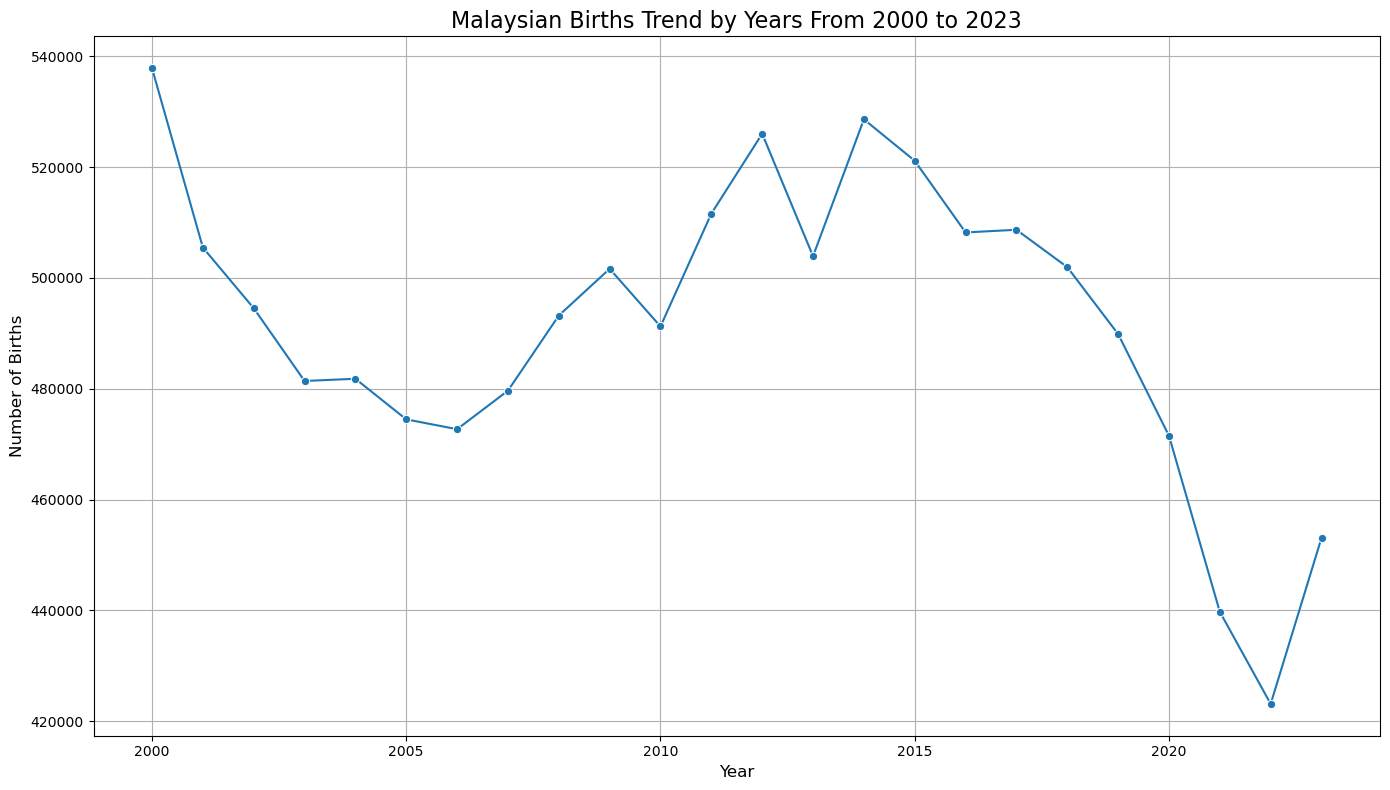

In [13]:
# Show visualization for births trend from 2000-2023
plt.figure(figsize=(14, 8))
time_counts = df_cleaned.groupby(df_cleaned['date'].dt.year)['abs'].sum()
sns.lineplot(x=time_counts.index, y=time_counts.values, marker='o')
plt.title('Malaysian Births Trend by Years From 2000 to 2023', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Births', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

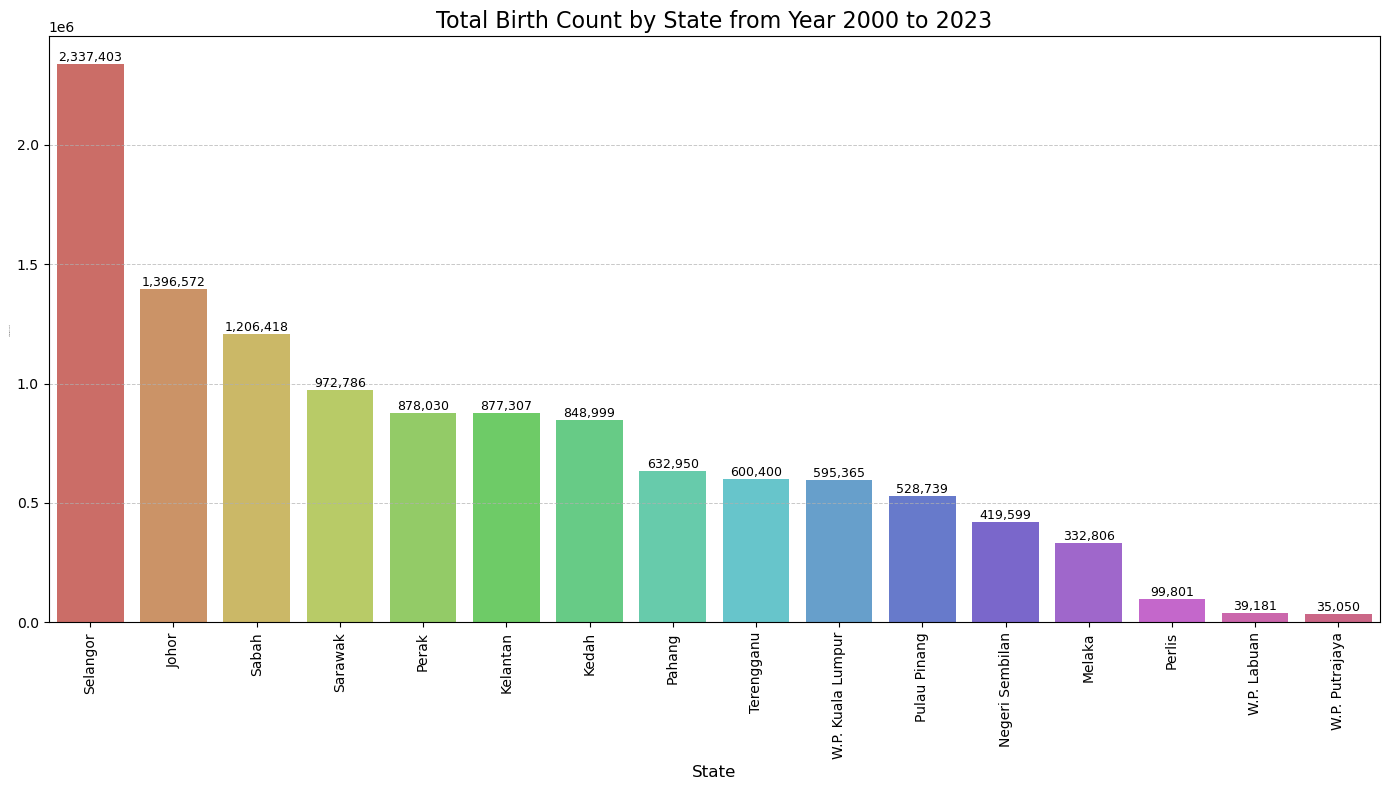

In [14]:
# Check distribution of births by state
plt.figure(figsize=(14, 8))

state_counts = df_cleaned.groupby('state')['abs'].sum().sort_values(ascending=False)
ax = sns.barplot(x=state_counts.index, y=state_counts.values, palette="hls")

plt.title('Total Birth Count by State from Year 2000 to 2023', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Birth Count ', fontsize=1)
plt.xticks(rotation=90, ha='center')

#  annotation loop
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,bar.get_height(),f'{int(bar.get_height()):,}',ha='center',va='bottom',fontsize=9)

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

plt.show()

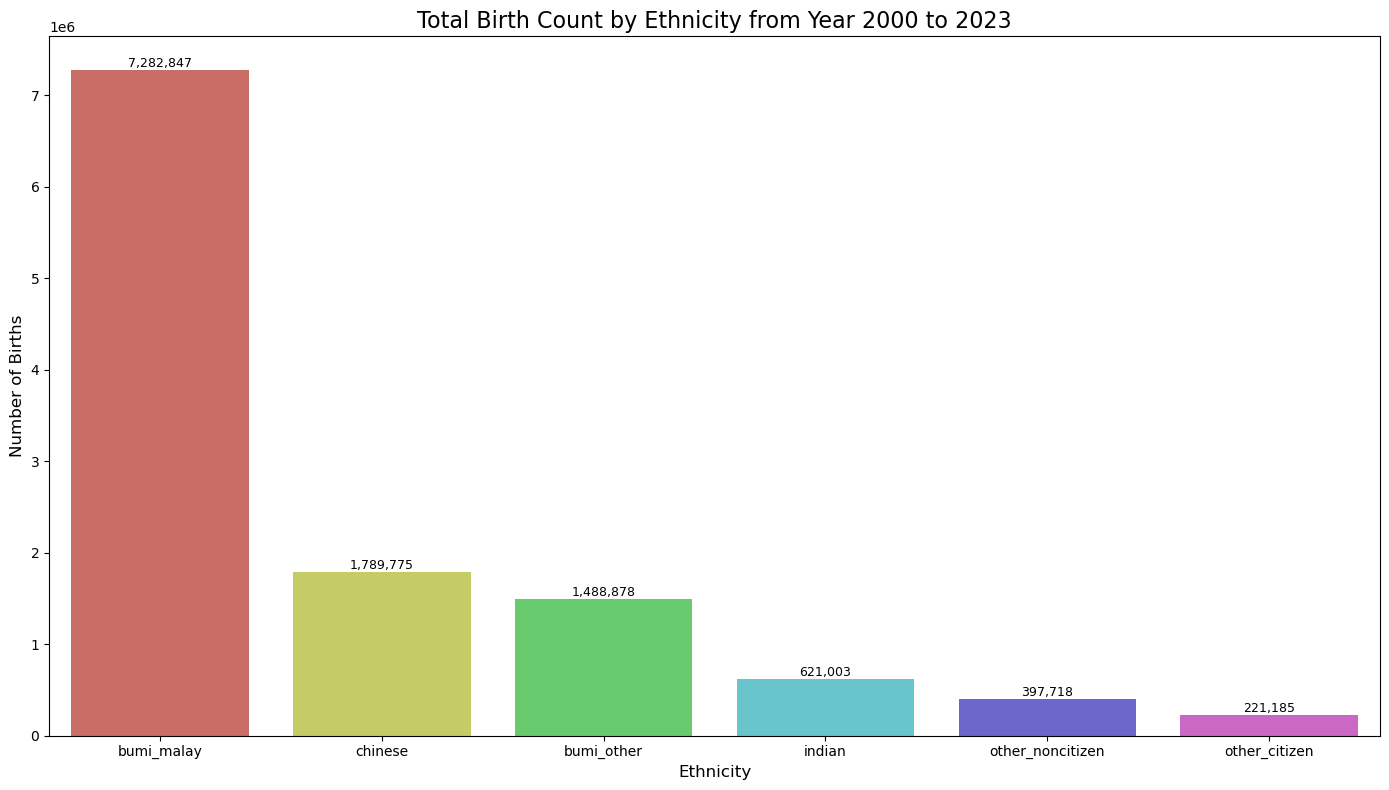

In [15]:
# Check distribution of births by ethnicity
plt.figure(figsize=(14, 8))
ethnicity_counts = df_cleaned.groupby('ethnicity')['abs'].sum().sort_values(ascending=False)

#Annonate value on top of the bar
ax=sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, palette="hls")
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,bar.get_height(),f'{int(bar.get_height()):,}',ha='center',va='bottom',fontsize=9)


plt.title('Total Birth Count by Ethnicity from Year 2000 to 2023', fontsize=16)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Number of Births', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

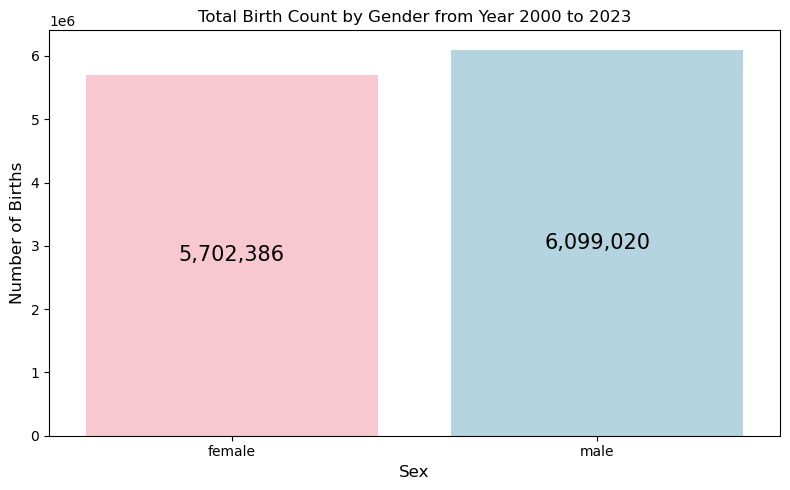

In [16]:
# Check distribution of births by sex 
plt.figure(figsize=(8, 5))

# Grouping and preparing the data
sex_counts = df_cleaned.groupby('sex')['abs'].sum()

# Define colors manually
colors = ['lightblue' if sex == 'male' else 'pink' for sex in sex_counts.index]

# Plotting
ax=sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=colors)

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{int(bar.get_height()):,}',       
        ha='center',
        va='center',
        fontsize=15,
        color='black'  
    )
    
    
plt.title('Total Birth Count by Gender from Year 2000 to 2023', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of Births', fontsize=12)
plt.tight_layout()
plt.show()

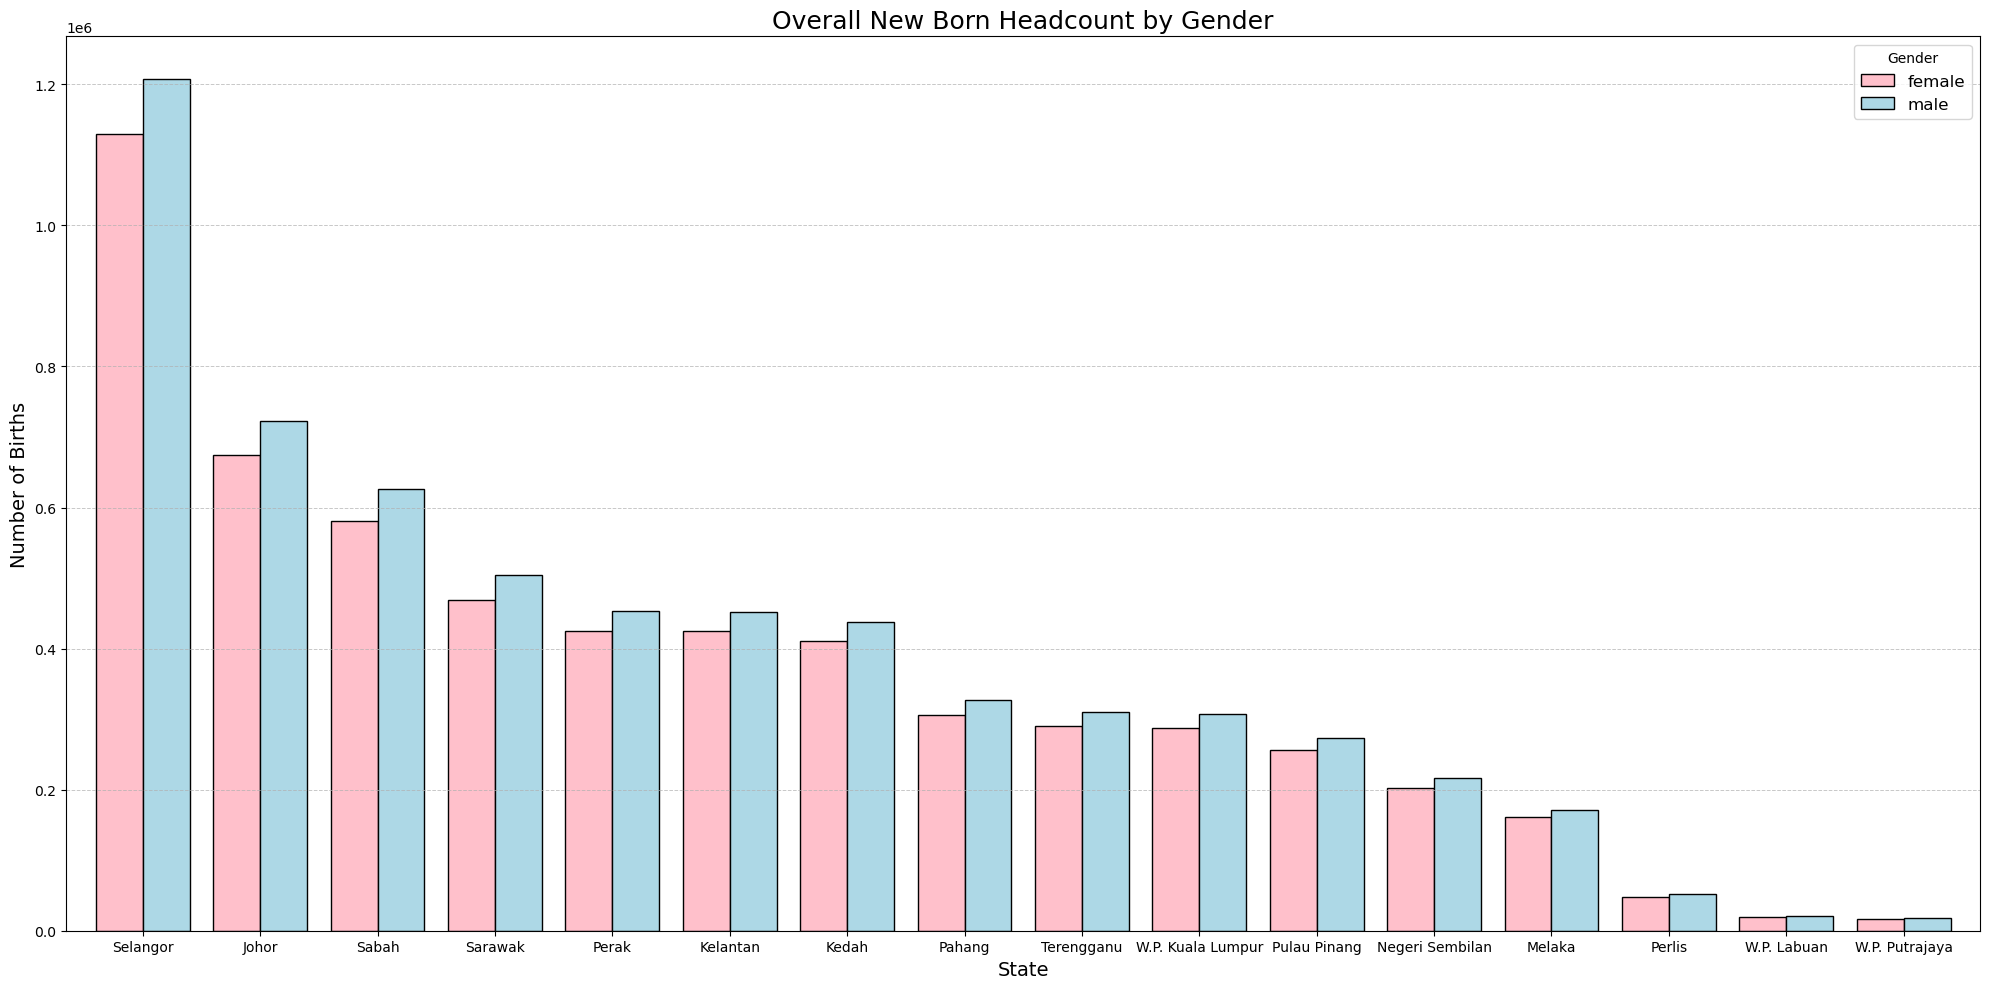

In [17]:
# distribution of births by state and sex
state_sex_counts = df_cleaned.groupby(['state', 'sex'])['abs'].sum().unstack()

# Sort by total births (add up across sexes)
state_sex_counts['total'] = state_sex_counts.sum(axis=1)
state_sex_counts = state_sex_counts.sort_values('total', ascending=False).drop(columns='total')

# Directly create colors list based on columns
colors = ['lightblue' if sex == 'male' else 'pink' for sex in state_sex_counts.columns]

state_sex_counts.plot(kind='bar',stacked=False,figsize=(20, 10),width=0.8,edgecolor='black',color=colors)
plt.title('Overall New Born Headcount by Gender', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Births', fontsize=14)
plt.legend(title='Gender', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
state_sex_counts

sex,female,male
state,,
Selangor,1129658.0,1207745.0
Johor,674399.0,722173.0
Sabah,580310.0,626108.0
Sarawak,468420.0,504366.0
Perak,425286.0,452744.0
Kelantan,424770.0,452537.0
Kedah,411329.0,437670.0
Pahang,306236.0,326714.0
Terengganu,290576.0,309824.0


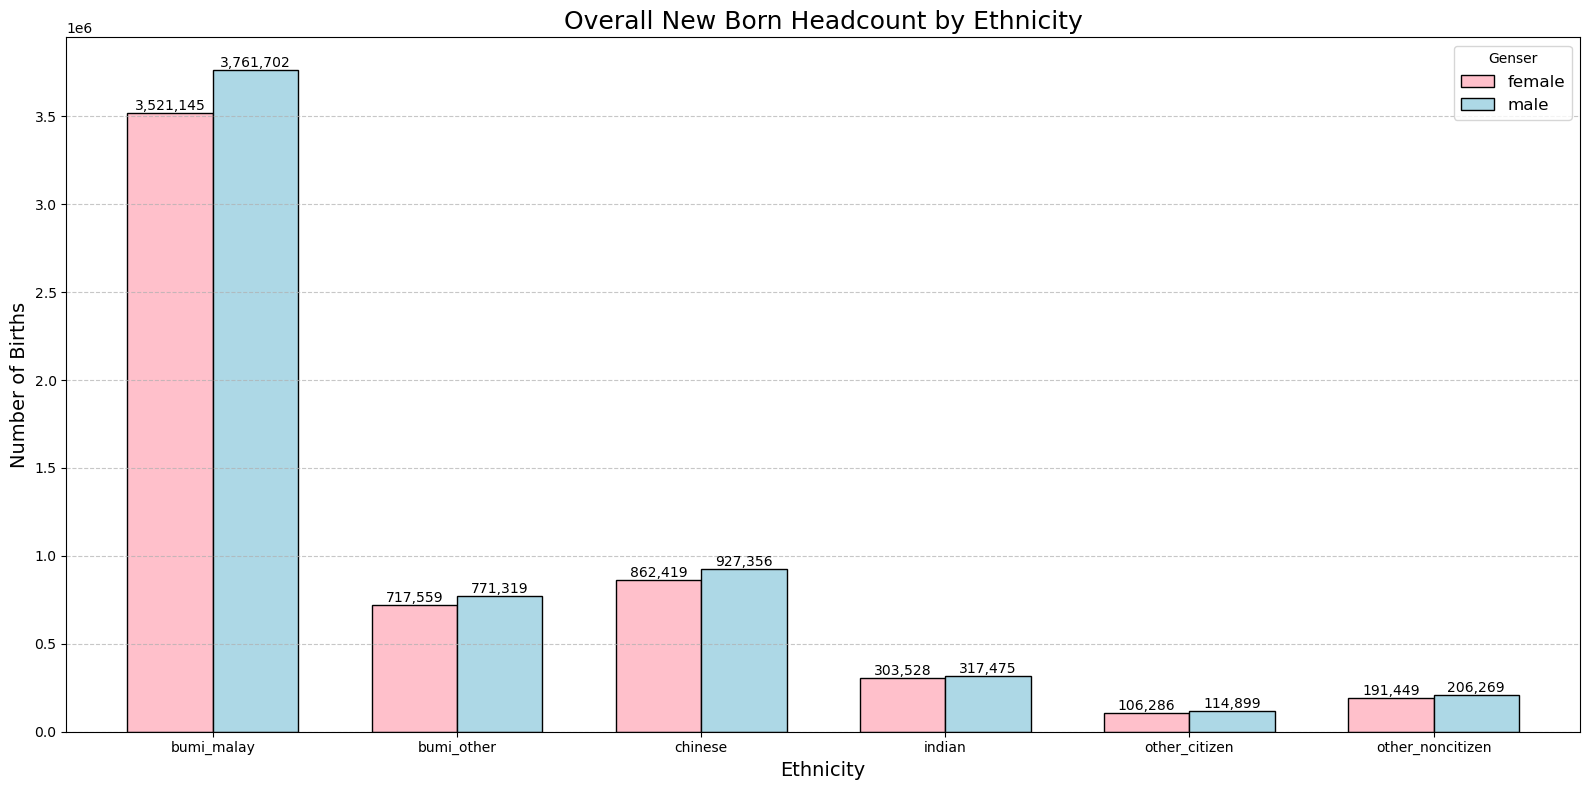

In [19]:
# Distribution of births by ethnicity 
ethnicity_sex_counts = df_cleaned.groupby(['ethnicity', 'sex'])['abs'].sum().unstack()


ax = ethnicity_sex_counts.plot(kind='bar',stacked=False,figsize=(16, 8),color=colors,edgecolor='black',width=0.7)
# Add annotations
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,bar.get_height(),f'{int(bar.get_height()):,}',ha='center',va='bottom',fontsize=10)


plt.title('Overall New Born Headcount by Ethnicity', fontsize=18)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Number of Births', fontsize=14)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Genser', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
ethnicity_sex_counts

sex,female,male
ethnicity,,
bumi_malay,3521145.0,3761702.0
bumi_other,717559.0,771319.0
chinese,862419.0,927356.0
indian,303528.0,317475.0
other_citizen,106286.0,114899.0
other_noncitizen,191449.0,206269.0


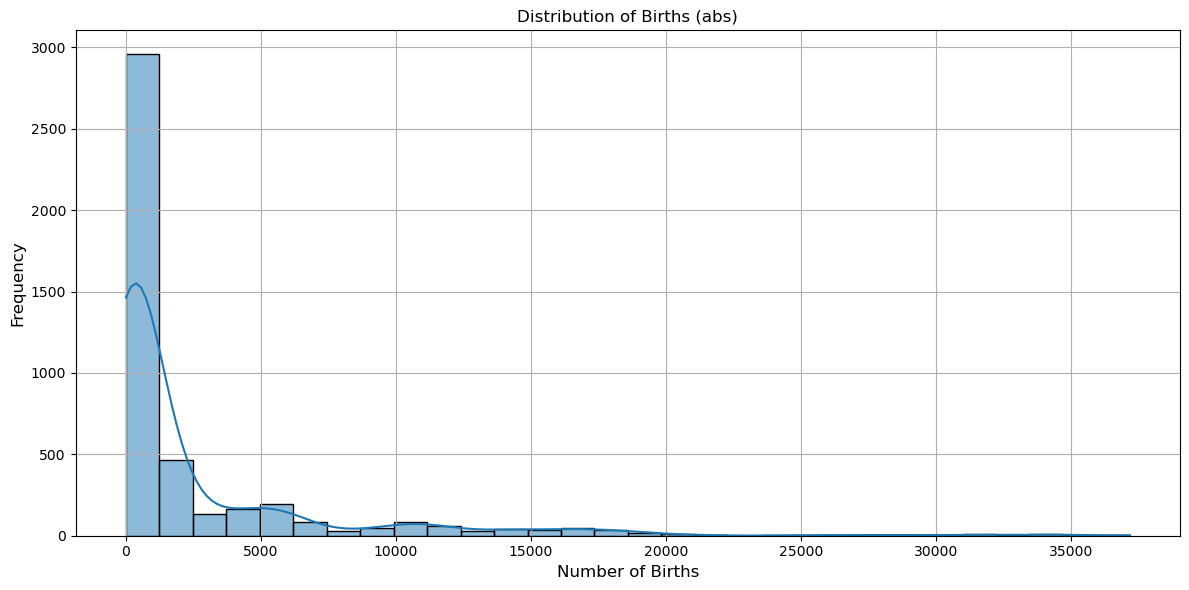

In [21]:
# Distribution of the target variable 'abs'
# It Skewed to the right and shows nothing
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['abs'].dropna(), kde=True, bins=30)
plt.title('Distribution of Births (abs)', fontsize=12)
plt.xlabel('Number of Births', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

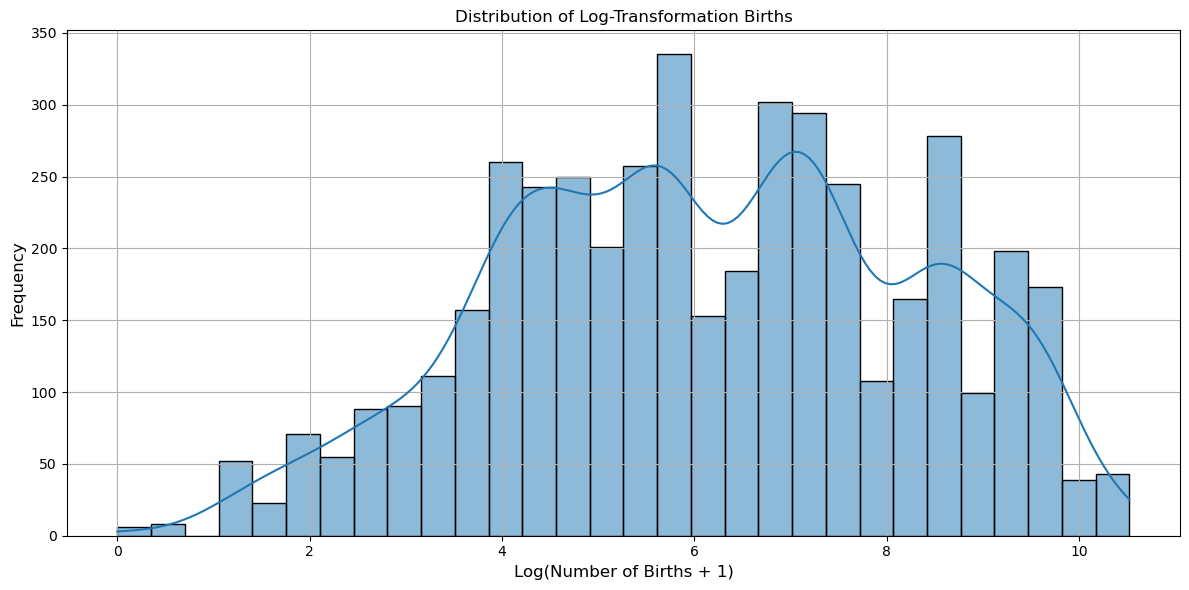

In [22]:
# Distribution of log-transformed target variable
# Follow Data Preparation Classes 20241114 
# The reason i perform Log Transfprmation m because normal distribution skew to the right , 
# To reduce skewness and approximate normality, i perform log-transfrmation
# https://medium.com/@stevechesa/log-transforming-target-variables-and-enhancing-tree-ensembles-53be435d8041
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(df_cleaned['abs'].dropna()), kde=True, bins=30)
plt.title('Distribution of Log-Transformation Births', fontsize=12)
plt.xlabel('Log(Number of Births + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

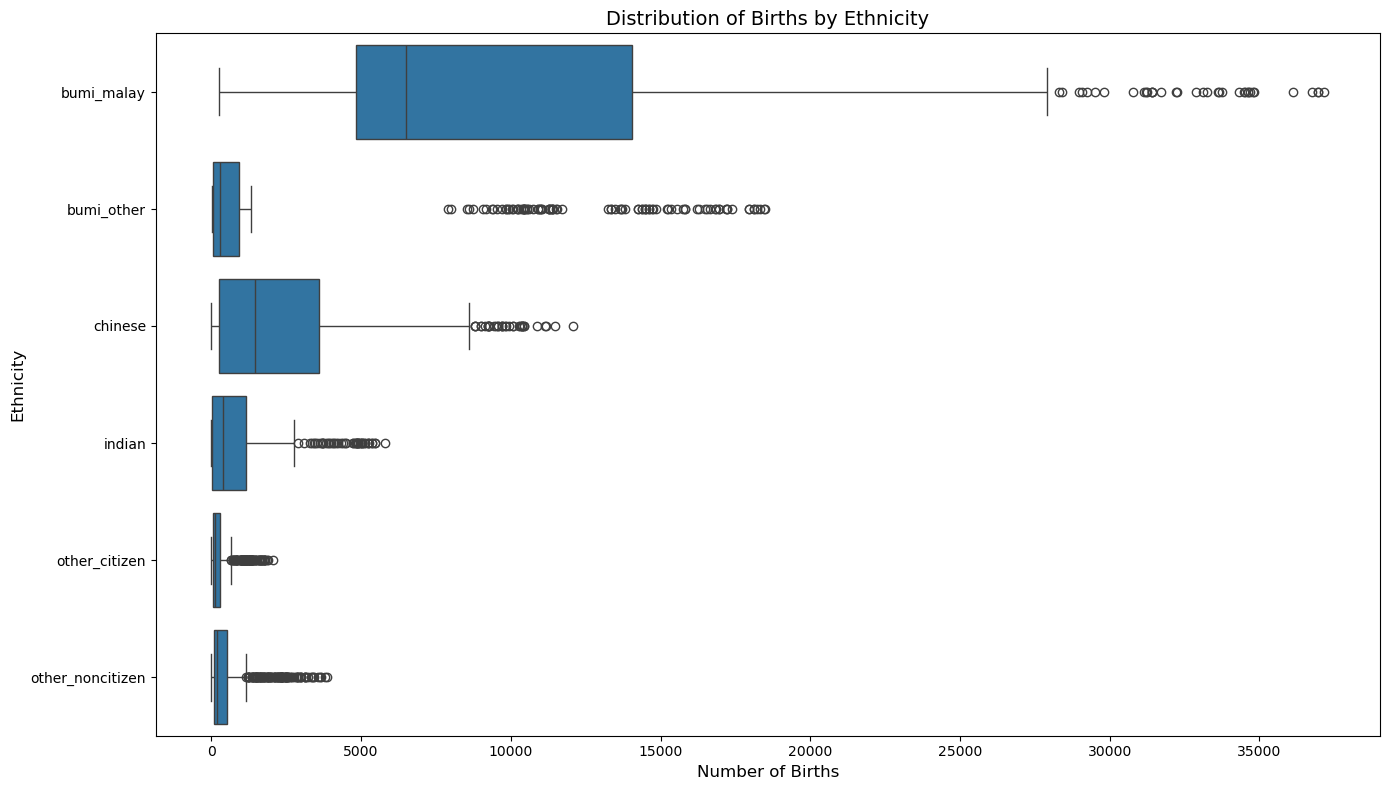

In [23]:
# Create box plots to check distribution by ethnicity
plt.figure(figsize=(14, 8))
sns.boxplot(x='abs', y='ethnicity', data=df_cleaned)
plt.title('Distribution of Births by Ethnicity', fontsize=14)
plt.xlabel('Number of Births', fontsize=12)
plt.ylabel('Ethnicity', fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1400x1500 with 0 Axes>

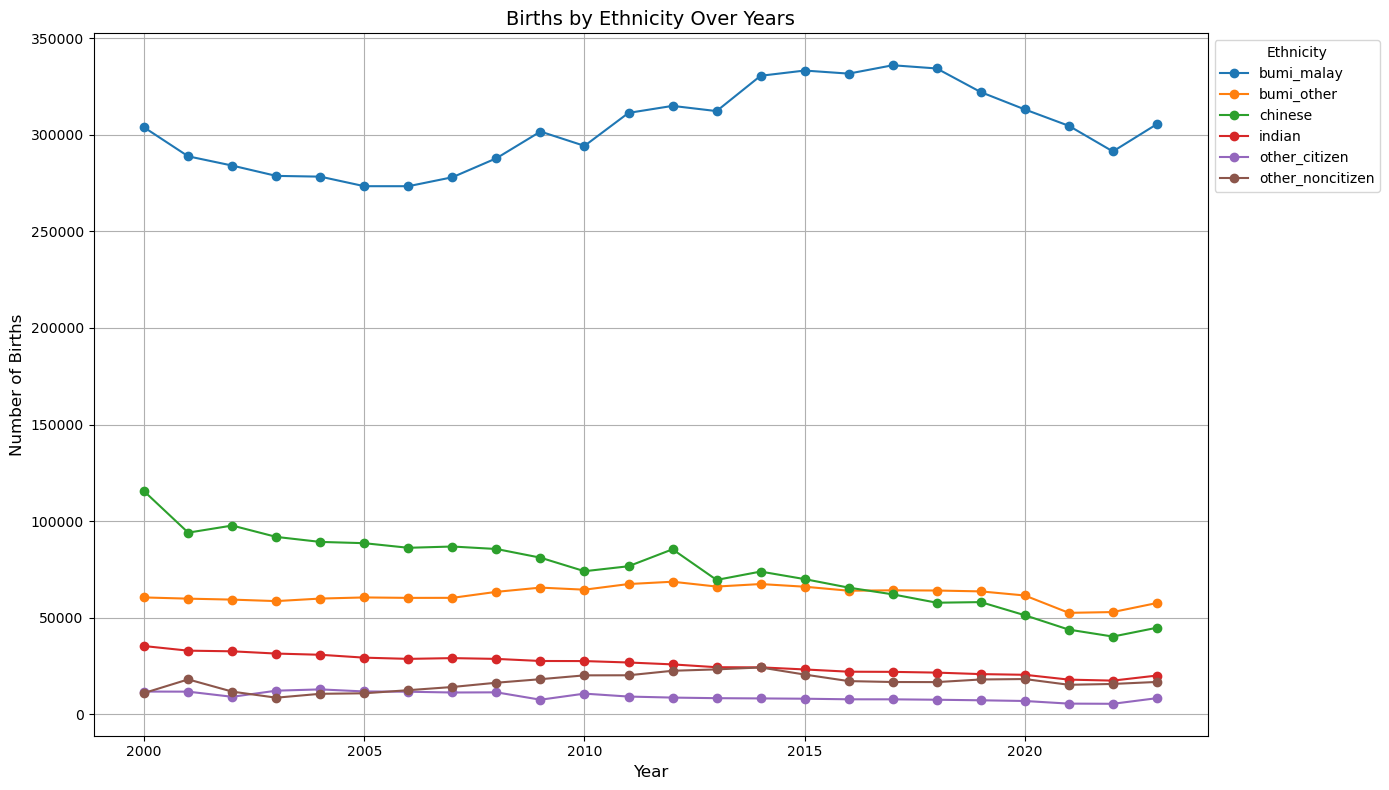

In [24]:
#Shows the number of births count by each ethnicity over years
plt.figure(figsize=(14, 15))

# Grouping and preparing the data
ethnicity_year = df_cleaned.groupby([df_cleaned['date'].dt.year, 'ethnicity'])['abs'].sum().unstack()

# Plotting
ethnicity_year.plot(marker='o', figsize=(14, 8))  # Set figure size here too
plt.title('Births by Ethnicity Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Births', fontsize=12)
plt.legend(title='Ethnicity', bbox_to_anchor=(1.00, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

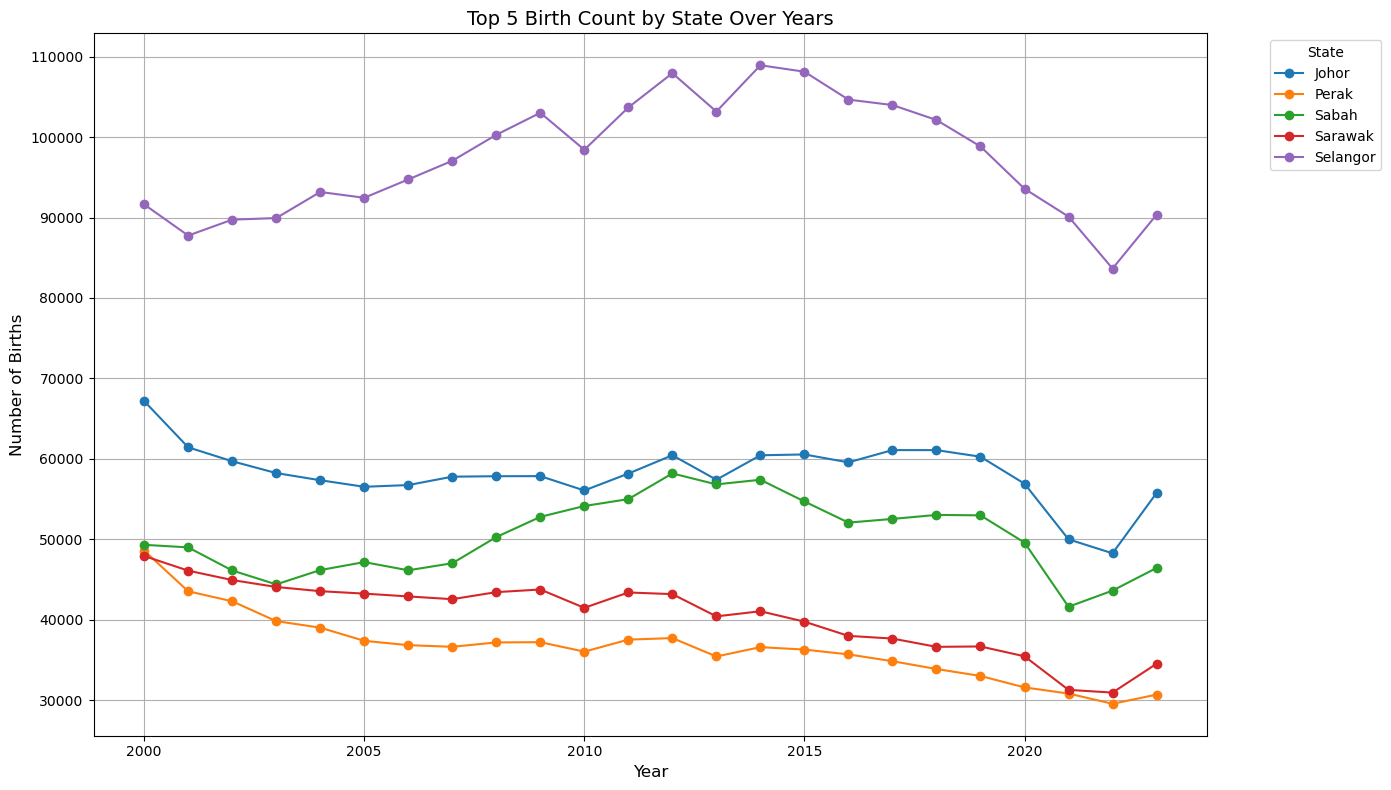

In [69]:
# Shows top 5 states over years
top_states = state_counts.head(5).index

plt.figure(figsize=(14, 8))

# Grouping and preparing the data
state_year = df_cleaned[df_cleaned['state'].isin(top_states)].groupby(
    [df_cleaned['date'].dt.year, 'state'])['abs'].sum().unstack()

# Plotting
state_year.plot(marker='o', figsize=(14, 8))
plt.title('Top 5 Birth Count by State Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Births', fontsize=12)


plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# Feature engineering: extract year, month, quarter, I think of extract it first maybe later could present a nice visualization report
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['quarter'] = df_cleaned['date'].dt.quarter
df_cleaned['log_abs'] = np.log1p(df_cleaned['abs'])


# Difrenciate features and targets
X = df_cleaned.drop(['abs', 'log_abs', 'date'], axis=1)
y = df_cleaned['abs']
y_log = df_cleaned['log_abs']

# Train-test split into Train 80% and Test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # from Original abs
_, _, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.2, random_state=42) # from Log-Transformed abs

print(f"\nTraining shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

print(f"y_log Training shape: {y_log_train.shape}")
print(f"y_log Testing shape: {y_log_test.shape}")


Training shape: (3590, 6)
Testing shape: (898, 6)
y_log Training shape: (3590,)
y_log Testing shape: (898,)


In [27]:
df_cleaned.head(10)

,state,date,sex,ethnicity,abs,year,month,quarter,log_abs
1496,Johor,2000-01-01,male,bumi_malay,19583.0,2000,1,1,9.882468
1497,Johor,2001-01-01,male,bumi_malay,18519.0,2001,1,1,9.826607
1498,Johor,2002-01-01,male,bumi_malay,18090.0,2002,1,1,9.803170
1499,Johor,2003-01-01,male,bumi_malay,17668.0,2003,1,1,9.779567
1500,Johor,2004-01-01,male,bumi_malay,17306.0,2004,1,1,9.758866
1501,Johor,2005-01-01,male,bumi_malay,16973.0,2005,1,1,9.739438
1502,Johor,2006-01-01,male,bumi_malay,17158.0,2006,1,1,9.750278
1503,Johor,2007-01-01,male,bumi_malay,17167.0,2007,1,1,9.750802
1504,Johor,2008-01-01,male,bumi_malay,17597.0,2008,1,1,9.775541
1505,Johor,2009-01-01,male,bumi_malay,18572.0,2009,1,1,9.829464


In [28]:
# Identify categorical into numerical by OnehotEncoder and filling missing number from the most frequent appears categorical 
# because it is the fastest way and would not make the graph skew to one side.
# I create pipeline to run imputer and one hot encoder (from class 29/4/2025)
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
categorical_cols = ['state', 'sex', 'ethnicity']

# Build Pipeline preprocessor
preprocessor = ColumnTransformer(transformers=[ 
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore')) # Convert back to Numeric
    ]), categorical_cols)
])

preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['state', 'sex', 'ethnicity'])])

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4488 entries, 1496 to 7853
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   state      4488 non-null   object        
 1   date       4488 non-null   datetime64[ns]
 2   sex        4488 non-null   object        
 3   ethnicity  4488 non-null   object        
 4   abs        4488 non-null   float64       
 5   year       4488 non-null   int32         
 6   month      4488 non-null   int32         
 7   quarter    4488 non-null   int32         
 8   log_abs    4488 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 427.1+ KB


In [30]:
# Get feature names after preprocessing

#Fit and transform
X_train_preprocessed  = preprocessor.fit_transform(X_train)
X_test_preprocessed  = preprocessor.transform(X_test)

# Print shape to confirm
print(f"\nPreprocessed training shape: {X_train_preprocessed.shape}")
print(f"Preprocessed testing shape: {X_test_preprocessed.shape}")



Preprocessed training shape: (3590, 24)
Preprocessed testing shape: (898, 24)


In [31]:
# Get feature names after preprocessing
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
feature_names =  list(ohe.get_feature_names_out(categorical_cols))

## Machine Learning Model - Run for Original Scale (Target Variable: abs)

In [32]:
# Create Modeling and evaluate for each model
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name}:")
    print(f"Roots Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")


Linear Regression:
Roots Mean Squared Error (RMSE): 3366.1378
Mean Squared Error (MSE): 11330883.5226
R-squared (R²): 0.5320

Random Forest:
Roots Mean Squared Error (RMSE): 580.5791
Mean Squared Error (MSE): 337072.0630
R-squared (R²): 0.9861

Support Vector Machine:
Roots Mean Squared Error (RMSE): 5338.1436
Mean Squared Error (MSE): 28495777.5818
R-squared (R²): -0.1771


## Machine Learning Model - Run for Log-Transformation Scale (Target Variable: log_abs)

In [33]:
# Important: I use the same features but target is now log_abs , by spliting in (y_log_train, y_log_test)
for name, model in models.items():
    model.fit(X_train_preprocessed, y_log_train)
    y_log_pred = model.predict(X_test_preprocessed)
    
    mse_log = mean_squared_error(y_log_test, y_log_pred)
    rmse_log = np.sqrt(mse_log)
    r2_log = r2_score(y_log_test, y_log_pred)
    
    print(f"\n{name} (Log Scale):")
    print(f"Roots Mean Squared Error (RMSE): {rmse_log:.4f}")    
    print(f"Mean Squared Error (MSE): {mse_log:.4f}")
    print(f"R-squared (R²): {r2_log:.4f}")


Linear Regression (Log Scale):
Roots Mean Squared Error (RMSE): 1.1373
Mean Squared Error (MSE): 1.2934
R-squared (R²): 0.7258

Random Forest (Log Scale):
Roots Mean Squared Error (RMSE): 0.3389
Mean Squared Error (MSE): 0.1148
R-squared (R²): 0.9757

Support Vector Machine (Log Scale):
Roots Mean Squared Error (RMSE): 0.3434
Mean Squared Error (MSE): 0.1179
R-squared (R²): 0.9750


# Model Comparison

In [81]:
# Collect results in a structured format
results = []
for model_name in models.keys():
    # Original scale metrics
    model = models[model_name].fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    results.append({
        'Model': model_name,
        'Scale': 'Original',
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MSE': mean_squared_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    })
    
    # Log scale metrics
    model.fit(X_train_preprocessed, y_log_train)
    y_log_pred = model.predict(X_test_preprocessed)
    results.append({
        'Model': model_name,
        'Scale': 'Log',
        'RMSE': np.sqrt(mean_squared_error(y_log_test, y_log_pred)),
        'MSE': mean_squared_error(y_log_test, y_log_pred),
        'R²': r2_score(y_log_test, y_log_pred)
    })

# Create formatted DataFrame
df_results = pd.DataFrame(results)
df_results




,Model,Scale,RMSE,MSE,R²
0,Linear Regression,Original,3366.137775,1.133088e+07,0.531958
1,Linear Regression,Log,1.137298,1.293446e+00,0.725790
2,Random Forest,Original,580.579076,3.370721e+05,0.986077
3,Random Forest,Log,0.338873,1.148348e-01,0.975655
4,Support Vector Machine,Original,5338.143646,2.849578e+07,-0.177067
5,Support Vector Machine,Log,0.343392,1.179178e-01,0.975001


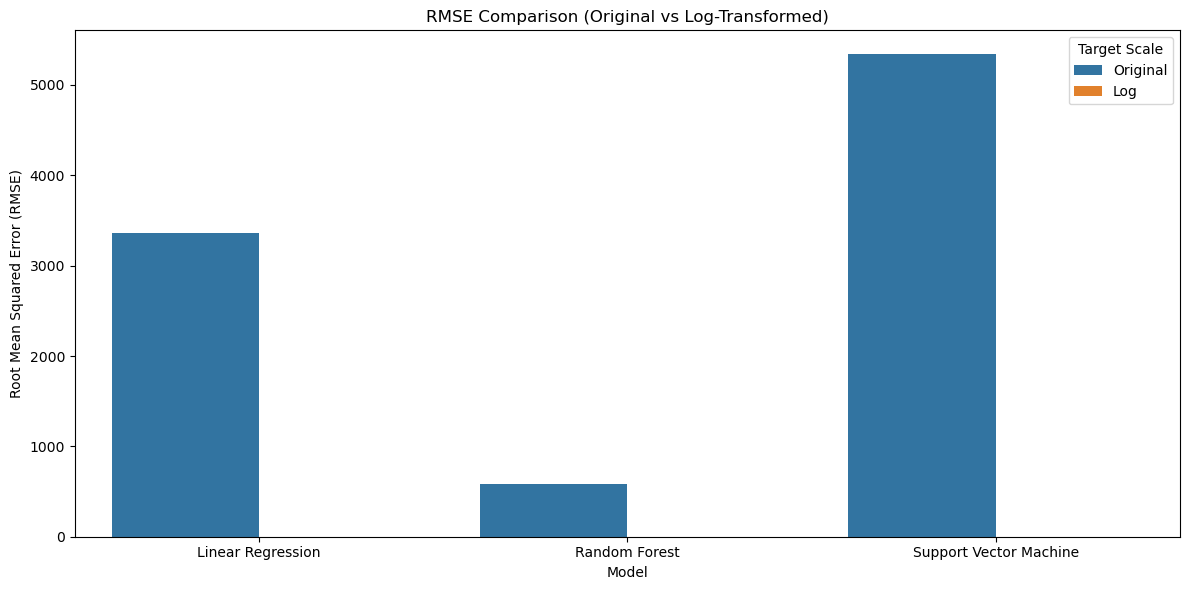

In [35]:
#Plot RMSE Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', hue='Scale', data=df_results)
plt.title('RMSE Comparison (Original vs Log-Transformed)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.legend(title='Target Scale')
plt.tight_layout()
plt.show()

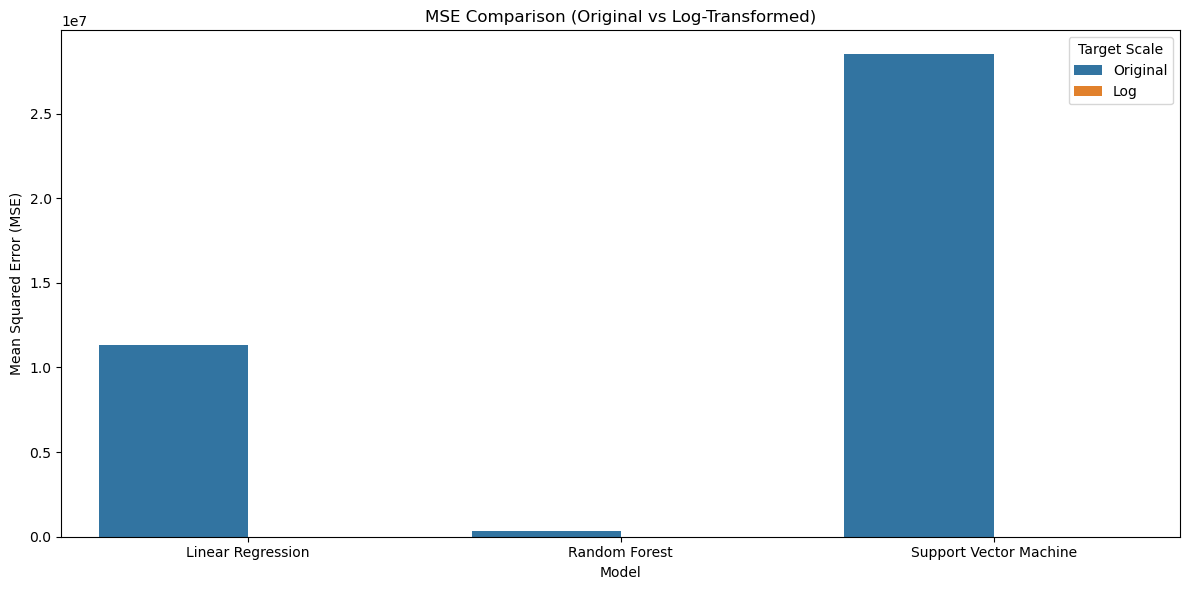

In [36]:
# Plot MSE Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MSE', hue='Scale', data=df_results)
plt.title('MSE Comparison (Original vs Log-Transformed)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.legend(title='Target Scale')

plt.tight_layout()
plt.show()

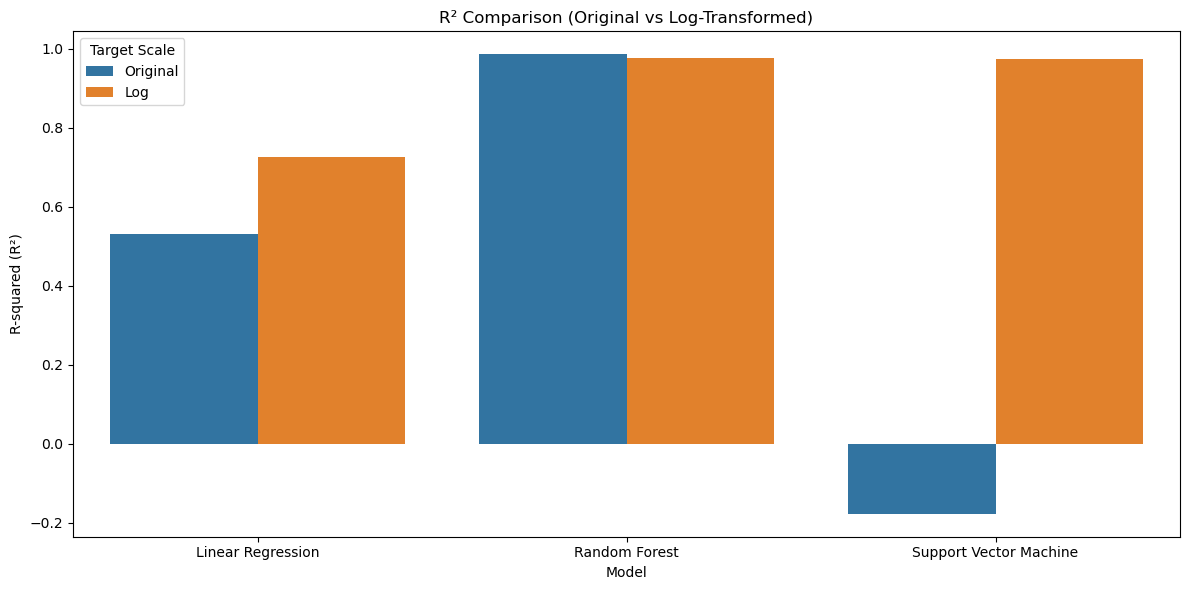

In [37]:
# Plot R2 Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R²', hue='Scale', data=df_results)
plt.title('R² Comparison (Original vs Log-Transformed)')
plt.ylabel('R-squared (R²)')
plt.xlabel('Model')
plt.legend(title='Target Scale')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

In [76]:
# Define hyperparameter grids for each model
param_grids = {
    'Support Vector Machine': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10]
    },
    
    'RandomForest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    },
    # Linear Regression cannot be tune
}

In [144]:
from sklearn.base import clone
tune_results = []

for model_name in models.keys():
    model = models[model_name]
    param_grid = param_grids.get(model_name, {})  # Get define parameters 
    
    # Original scale tuning
    if param_grid:
        grid = GridSearchCV(model, param_grid, 
                          scoring='neg_mean_squared_error',
                          cv=10, verbose=1, n_jobs=-1)
        grid.fit(X_train_preprocessed, y_train)
        best_model = grid.best_estimator_
    else:
        # For models without hyperparameters
        best_model = clone(model).fit(X_train_preprocessed, y_train)
    
    y_pred = best_model.predict(X_test_preprocessed)
    tune_results.append({
        'Model': model_name,
        'Scale': 'Original',
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MSE': mean_squared_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    })
    
    # Log-transformed scale tuning
    if param_grid:
        grid_log = GridSearchCV(model, param_grid,
                              scoring='neg_mean_squared_error',
                              cv=10, verbose=1, n_jobs=-1)
        grid_log.fit(X_train_preprocessed, y_log_train)
        best_model_log = grid_log.best_estimator_
    else:
        best_model_log = clone(model).fit(X_train_preprocessed, y_log_train)
    
    y_log_pred = best_model_log.predict(X_test_preprocessed)
    tune_results.append({
        'Model': model_name,
        'Scale': 'Log',
        'RMSE': np.sqrt(mean_squared_error(y_log_test, y_log_pred)),
        'MSE': mean_squared_error(y_log_test, y_log_pred),
        'R²': r2_score(y_log_test, y_log_pred)
    })
    
df_tune_results = pd.DataFrame(tune_results)
df_tune_results

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits


,Model,Scale,RMSE,MSE,R²
0,Linear Regression,Original,3366.137775,1.133088e+07,0.531958
1,Linear Regression,Log,1.137298,1.293446e+00,0.725790
2,Random Forest,Original,580.579076,3.370721e+05,0.986077
3,Random Forest,Log,0.338873,1.148348e-01,0.975655
4,Support Vector Machine,Original,4234.096656,1.792757e+07,0.259470
5,Support Vector Machine,Log,0.344276,1.185260e-01,0.974873


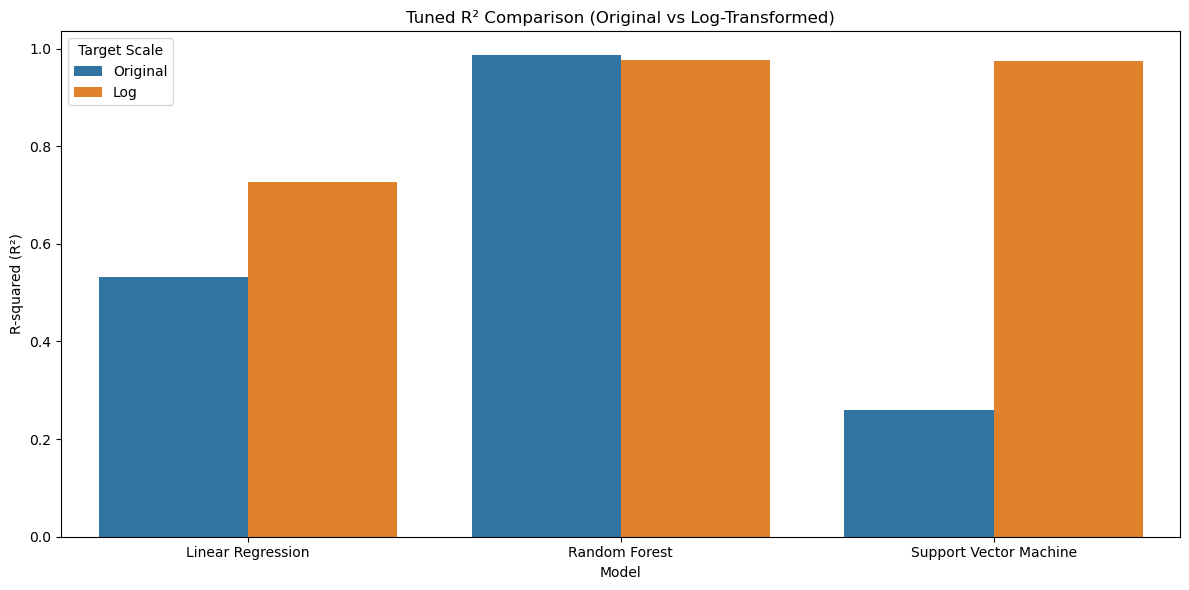

In [145]:
# I didnot perform RMSE and MSE comparison visualization due to the big scale and it shows nothing
# Plot R2 Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R²', hue='Scale', data=df_tune_results)
plt.title('Tuned R² Comparison (Original vs Log-Transformed)')
plt.ylabel('R-squared (R²)')
plt.xlabel('Model')
plt.legend(title='Target Scale')
plt.tight_layout()
plt.show()

In [147]:
df_combined = pd.concat([df_results, df_tune_results], axis=1, keys=['Results', 'Tuned Results'])

# Display the combined DataFrame
df_combined

Results                                                 \
                    Model     Scale         RMSE           MSE        R²   
0       Linear Regression  Original  3366.137775  1.133088e+07  0.531958   
1       Linear Regression       Log     1.137298  1.293446e+00  0.725790   
2           Random Forest  Original   580.579076  3.370721e+05  0.986077   
3           Random Forest       Log     0.338873  1.148348e-01  0.975655   
4  Support Vector Machine  Original  5338.143646  2.849578e+07 -0.177067   
5  Support Vector Machine       Log     0.343392  1.179178e-01  0.975001   

            Tuned Results                                                 
                    Model     Scale         RMSE           MSE        R²  
0       Linear Regression  Original  3366.137775  1.133088e+07  0.531958  
1       Linear Regression       Log     1.137298  1.293446e+00  0.725790  
2           Random Forest  Original   580.579076  3.370721e+05  0.986077  
3           Random Forest       Log     0.338873  1.148348e-01  0.975655  
4  Support Vector Machine  Original  4234.096656  1.792757e+07  0.259470  
5  Support Vector Machine       Log     0.344276  1.185260e-01  0.974873

## Time Series Analysis 

In [90]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


# Suppress warnings 
warnings.filterwarnings("ignore")

In [91]:
# Load the dataset ada to avoid data lost
df = pd.read_csv('birth_sex_ethnic_state.csv')

# I make date as in datetime formate and loacte it into index as well sorted according by date
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)


df.head()

,state,sex,ethnicity,abs
date,,,,
2000-01-01,Johor,both,overall,67183.0
2000-01-01,W.P. Labuan,female,bumi_malay,299.0
2000-01-01,Melaka,female,other_noncitizen,20.0
2000-01-01,Johor,both,bumi_other,867.0
2000-01-01,Kedah,both,bumi_other,79.0


In [92]:
# Group by state, sex, and ethnicity to calculate median values (I perfrom group median it will more precise )
grouped_medians = df.groupby(['state', 'sex', 'ethnicity'])['abs'].transform('median')
# Fill missing values with group medians
df['abs'] = df['abs'].fillna(grouped_medians)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7854 entries, 2000-01-01 to 2023-01-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      7854 non-null   object 
 1   sex        7854 non-null   object 
 2   ethnicity  7854 non-null   object 
 3   abs        7854 non-null   float64
dtypes: float64(1), object(3)
memory usage: 306.8+ KB


In [116]:
# select the dataset by gropping rows where sex="male" or ethnicity="chinesee" only
df_select = df[(df['sex'] == 'both') & (df['ethnicity'] == 'overall')].copy()

In [117]:
df_select.head(30)

,state,sex,ethnicity,abs
date,,,,
2000-01-01,Johor,both,overall,67183.0
2000-01-01,W.P. Labuan,both,overall,1495.0
2000-01-01,W.P. Kuala Lumpur,both,overall,29382.0
2000-01-01,Kedah,both,overall,41014.0
2000-01-01,Sarawak,both,overall,47920.0
2000-01-01,Melaka,both,overall,15304.0
2000-01-01,Sabah,both,overall,49308.0
2000-01-01,Perlis,both,overall,4651.0
2000-01-01,Pulau Pinang,both,overall,27337.0


In [118]:
top_abs = df_select.groupby('state')['abs'].sum().sort_values(ascending=False).head(5)

In [119]:
top_abs

state
Selangor    2337586.0
Johor       1396973.0
Sabah       1206397.0
Sarawak      972187.0
Perak        878108.0
Name: abs, dtype: float64

## State: Perak

In [120]:
# Filter Selangor data (sex='both', ethnicity='overall')
Perak_df = df_select[(df_select['state'] == 'Perak') ].copy()

In [121]:
Perak_df

,state,sex,ethnicity,abs
date,,,,
2000-01-01,Perak,both,overall,48589.0
2001-01-01,Perak,both,overall,43533.0
2002-01-01,Perak,both,overall,42289.0
2003-01-01,Perak,both,overall,39822.0
2004-01-01,Perak,both,overall,39012.0
2005-01-01,Perak,both,overall,37369.0
2006-01-01,Perak,both,overall,36835.0
2007-01-01,Perak,both,overall,36628.0
2008-01-01,Perak,both,overall,37174.0


In [122]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(Perak_df['abs'].dropna())


# P-values lesser than 0.05, meaning Original is Stationary  , and I use Consist to use ARIMA because the data aren't given daily , itsyearly data . Hence I decide to use ARIMA only to predict fututre "abs" value
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Number of Lags Used:", adf_result[2])
print("Number of Observations:", adf_result[3])
print("Critical Values:", adf_result[4])

ADF Statistic: -3.64674607571649
p-value: 0.004927722508232913
Number of Lags Used: 0
Number of Observations: 23
Critical Values: {'1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307}


<Axes: title={'center': 'Differenced Series (d=1)'}, xlabel='date'>

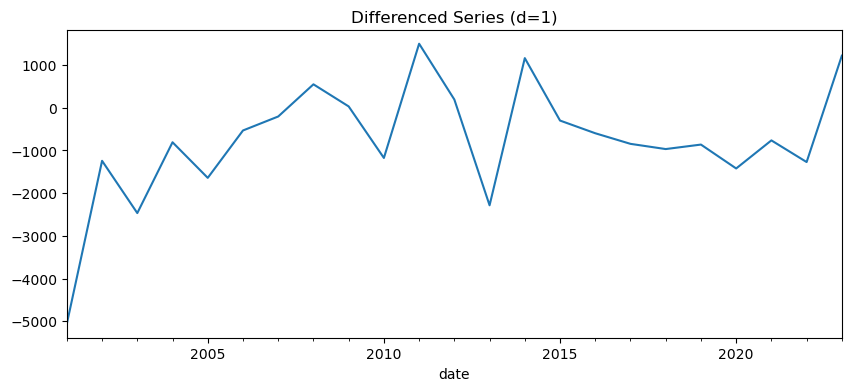

In [123]:
Perak_diff1 = Perak_df['abs'].diff().dropna()
Perak_diff1.plot(title='Differenced Series (d=1)', figsize=(10,4))

 ## ACF and PACF Plots

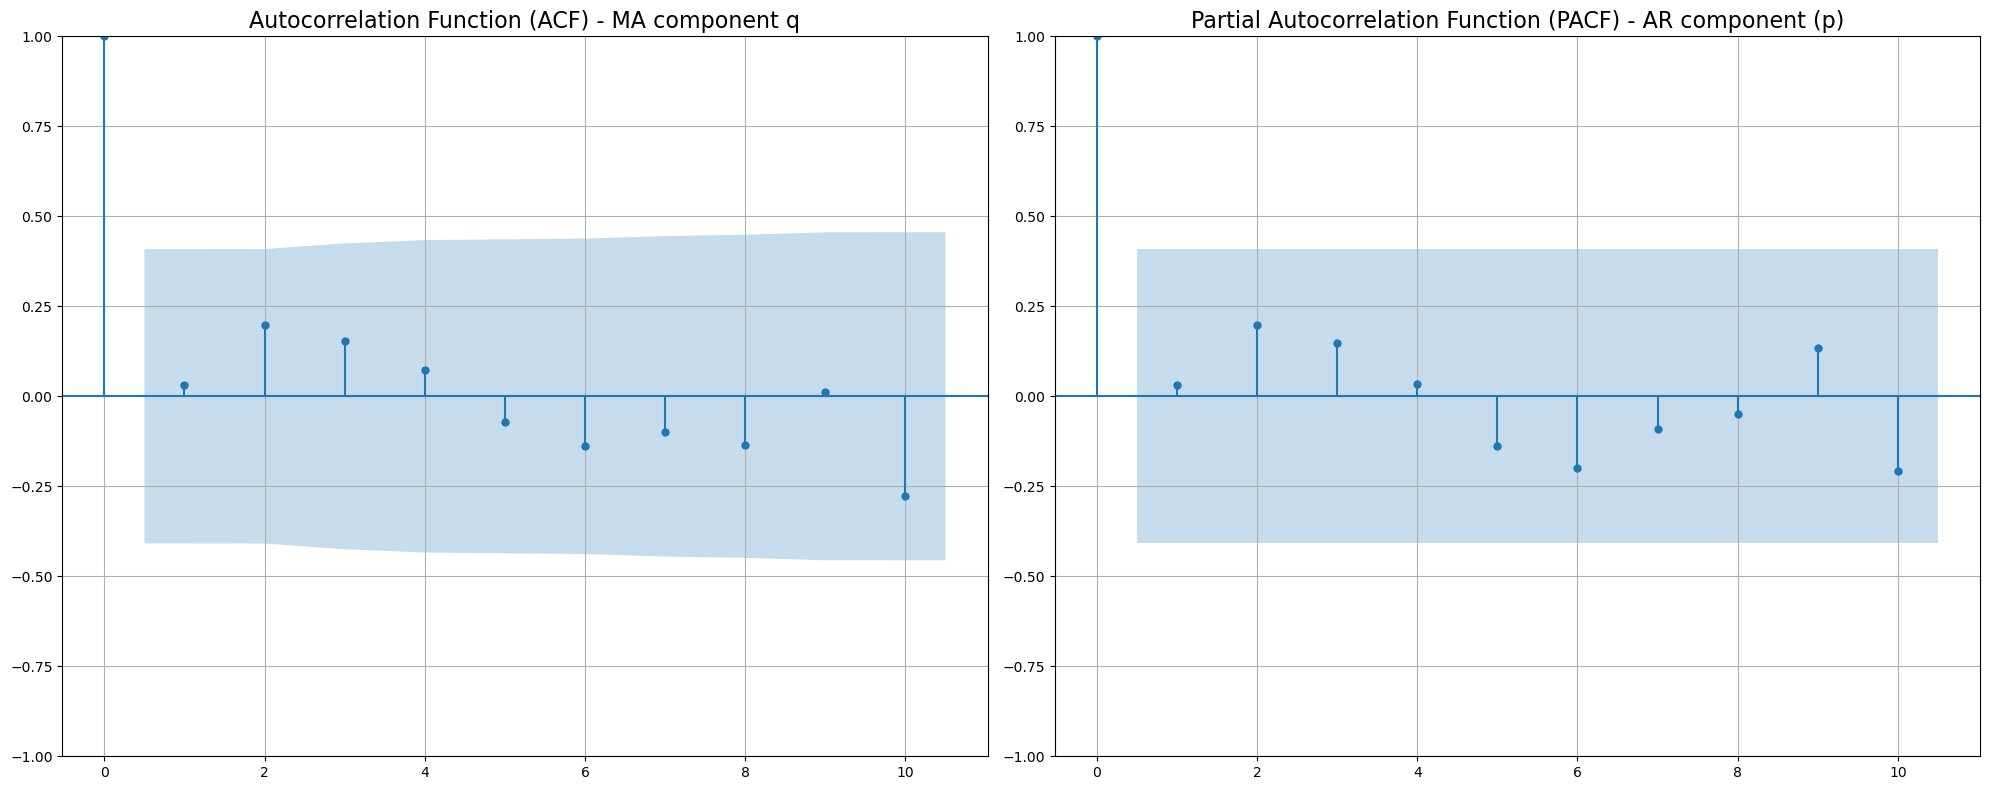

In [124]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plot_acf(Perak_diff1, ax=plt.gca(), lags=10)
plt.title('Autocorrelation Function (ACF) - MA component q', fontsize=16)
plt.grid(True) 

plt.subplot(1, 2, 2)
plot_pacf(Perak_diff1, ax=plt.gca(), lags=10)
plt.title('Partial Autocorrelation Function (PACF) - AR component (p)', fontsize=16)
plt.grid(True)  

plt.tight_layout()
plt.show()

## ARIMA Model

In [125]:
from statsmodels.tsa.arima.model import ARIMA


model_arima = ARIMA(Perak_df['abs'], order=(1, 1, 1))
arima_result = model_arima.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                    abs   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -193.703
Date:                Sun, 04 May 2025   AIC                            393.407
Time:                        10:11:14   BIC                            396.813
Sample:                    01-01-2000   HQIC                           394.264
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7844      0.045     17.330      0.000       0.696       0.873
ma.L1         -1.0000      0.282     -3.552      0.000      -1.552      -0.448
sigma2      1.287e+06   2.19e-07   5.89e+12      0.0

In [126]:
# Generate predictions 
# "start=1" Starts prediction from the second observation because the first value is lost, so prediction begins from the second value.
# "end=len(johor_df)-1" Ends at the last observation.
predictions = arima_result.predict(start=1, end=len(Perak_df)-1, typ='levels')


# Slices the actual time series to match the prediction indices, so again starting from index 1 to the end. So i can compare it with the model's predictions.
# Actual values (align with prediction indices)
actual = Perak_df['abs'][1:]

# Evaluation Metrics
perak_mae = mean_absolute_error(actual, predictions)
perak_mse = mean_squared_error(actual, predictions)
perak_rmse = np.sqrt(mse)
perak_mape = np.mean(np.abs((actual - predictions) / actual)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {perak_mae:.4f}")
print(f"Mean Squared Error (MSE): {perak_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {perak_rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {perak_mape:.2f}%")

Mean Absolute Error (MAE): 941.4983
Mean Squared Error (MSE): 1199789.3748
Root Mean Squared Error (RMSE): 5338.1436
Mean Absolute Percentage Error (MAPE): 2.65%


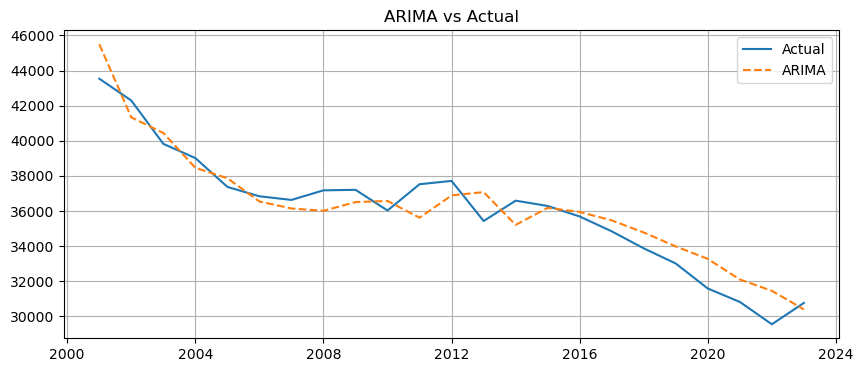

In [127]:
plt.figure(figsize=(10, 4))
plt.plot(Perak_df.index[1:], actual, label='Actual')
plt.plot(Perak_df.index[1:], predictions, label='ARIMA', linestyle='--')
plt.legend()
plt.title('ARIMA vs Actual')
plt.grid(True)
plt.show()

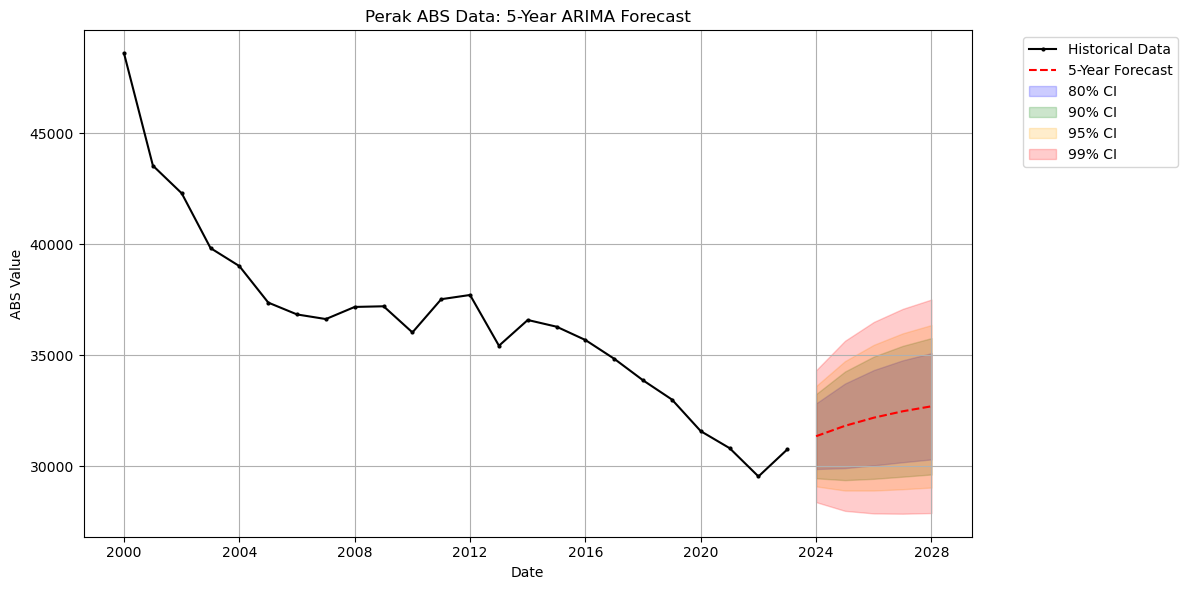

,Date,Forecasted ABS
0,2024-01-01,31354.527625
1,2025-01-01,31821.671989
2,2026-01-01,32188.109829
3,2027-01-01,32475.551359
4,2028-01-01,32701.026526


In [128]:
import statsmodels.api as sm

# Extract actual values for ARIMA modeling
abs_values = Perak_df["abs"].values
dates = Perak_df.index

# Split data into training and test sets (80-20 split)
train_size = int(len(abs_values) * 0.8)
train, test = abs_values[:train_size], abs_values[train_size:]

# Fit ARIMA model on training data
model = sm.tsa.ARIMA(train, order=(1, 1, 1))
arima_result = model.fit()

# Forecast test set period
forecast_steps = len(test)
result = arima_result.get_forecast(steps=forecast_steps)
forecast = result.predicted_mean

model_full = sm.tsa.ARIMA(abs_values, order=(1, 1, 1))
arima_result_full = model_full.fit()

# Determine forecast parameters 
forecast_years = 5
forecast_steps_future = forecast_years 

# Generate future dates
last_date = dates[-1]
future_dates = pd.date_range(
    start=last_date,
    periods=forecast_steps_future + 1,
    freq='YS'  
)[1:]

# Forecast future values
future_result = arima_result_full.get_forecast(steps=forecast_steps_future)
future_forecast = future_result.predicted_mean

# Create plot for future forecast
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(dates, abs_values, label='Historical Data', color='black', marker='.', markersize=4)

# Plot future forecast
plt.plot(future_dates, future_forecast, label='5-Year Forecast', color='red', linestyle='--')

# Plot confidence intervals for future forecast
intervals = [0.2, 0.1, 0.05, 0.01]  # 80%, 90%, 95%, 99%
colors = ['blue', 'green', 'orange', 'red']
for alpha, color in zip(intervals, colors):
    ci = future_result.conf_int(alpha=alpha)
    plt.fill_between(future_dates,
                    ci[:, 0],
                    ci[:, 1],
                    color=color, alpha=0.2,
                    label=f'{(1-alpha)*100:.0f}% CI')

# Formatting
plt.title(f'Perak ABS Data: {forecast_years}-Year ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('ABS Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print future forecast values
future_forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted ABS': future_forecast
})
future_forecast_df

## Hyperparameter Tuning for ARIMA

In [129]:
aic_values = []

for d in range(0, 2):  # Differencing order (0 or 1)
    for p in range(0, 3):  # AR order (0, 1, or 2)
        for q in range(0, 3):  # MA order (0, 1, or 2)
            try:
                # Fit ARIMA model
                model = ARIMA(Perak_df['abs'].dropna(), order=(p, d, q))
                results = model.fit()
                
                # Store the parameters and AIC value
                aic_values.append([p, d, q, results.aic])
                
                # Print progress (optional)
                print(f"ARIMA{p,d,q} - AIC: {results.aic:.5f}")
            except:
                # Skip combinations that don't work
                pass

ARIMA(0, 0, 0) - AIC: 471.94608
ARIMA(0, 0, 1) - AIC: 455.41528
ARIMA(0, 0, 2) - AIC: 446.31788
ARIMA(1, 0, 0) - AIC: 430.29041
ARIMA(1, 0, 1) - AIC: 431.18581
ARIMA(1, 0, 2) - AIC: 431.33804
ARIMA(2, 0, 0) - AIC: 430.08410
ARIMA(2, 0, 1) - AIC: 430.89201
ARIMA(2, 0, 2) - AIC: 424.39110
ARIMA(0, 1, 0) - AIC: 405.48110
ARIMA(0, 1, 1) - AIC: 396.09423
ARIMA(0, 1, 2) - AIC: 397.78017
ARIMA(1, 1, 0) - AIC: 398.25766
ARIMA(1, 1, 1) - AIC: 393.40690
ARIMA(1, 1, 2) - AIC: 391.60364
ARIMA(2, 1, 0) - AIC: 400.92002
ARIMA(2, 1, 1) - AIC: 391.48256
ARIMA(2, 1, 2) - AIC: 393.39688


In [130]:
# Convert to DataFrame for easier analysis
aic_df = pd.DataFrame(aic_values, columns=['p', 'd', 'q', 'AIC'])

# Find the parameters with the lowest AIC
best_params = aic_df.loc[aic_df['AIC'].idxmin()]


In [131]:
# Find the parameters with the lowest AIC
aic_df = pd.DataFrame(aic_values, columns=['p', 'd', 'q', 'AIC'])
best_params = aic_df.loc[aic_df['AIC'].idxmin()]

# Now use these best parameters for the model
best_p, best_d, best_q = int(best_params['p']), int(best_params['d']), int(best_params['q'])

# Fit the best model
best_arima = ARIMA(Perak_df['abs'], order=(best_p, best_d, best_q))
best_result = best_arima.fit()

# Print summary of the best model
print("\nBest Model Summary:")
print(best_result.summary())


Best Model Summary:
                               SARIMAX Results                                
Dep. Variable:                    abs   No. Observations:                   24
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -191.741
Date:                Sun, 04 May 2025   AIC                            391.483
Time:                        10:11:19   BIC                            396.025
Sample:                    01-01-2000   HQIC                           392.625
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7526      0.118      6.355      0.000       0.520       0.985
ar.L2          0.0887      0.111      0.801      0.423      -0.128       0.306
ma.L1         -1.0000      0.37

In [132]:
# Generate predictions with best model
predictions_best = best_result.predict(start=1, end=len(Perak_df)-1, typ='levels')

# Evaluation Metrics for best model
perak_mae_best = mean_absolute_error(actual, predictions_best)
perak_mse_best = mean_squared_error(actual, predictions_best)
perak_rmse_best = np.sqrt(perak_mse_best)
perak_mape_best = np.mean(np.abs((actual - predictions_best) / actual)) * 100

# Print metrics comparison
print(f"Tuned MAE: {perak_mae_best:.4f}")
print(f"Tuned MSE: {perak_mse_best:.4f}")
print(f"Tuned RMSE: {perak_rmse_best:.4f}")
print(f"Tuned MAPE: {perak_mape_best:.2f}%")

Tuned MAE: 835.8528
Tuned MSE: 984452.7377
Tuned RMSE: 992.1959
Tuned MAPE: 2.40%


In [133]:
# determine the best model for future forecasts
model_full_best = ARIMA(abs_values, order=(best_p, best_d, best_q))
arima_result_full_best = model_full_best.fit()

# Forecast future values with best model
future_result_best = arima_result_full_best.get_forecast(steps=forecast_steps_future)
future_forecast_best = future_result_best.predicted_mean


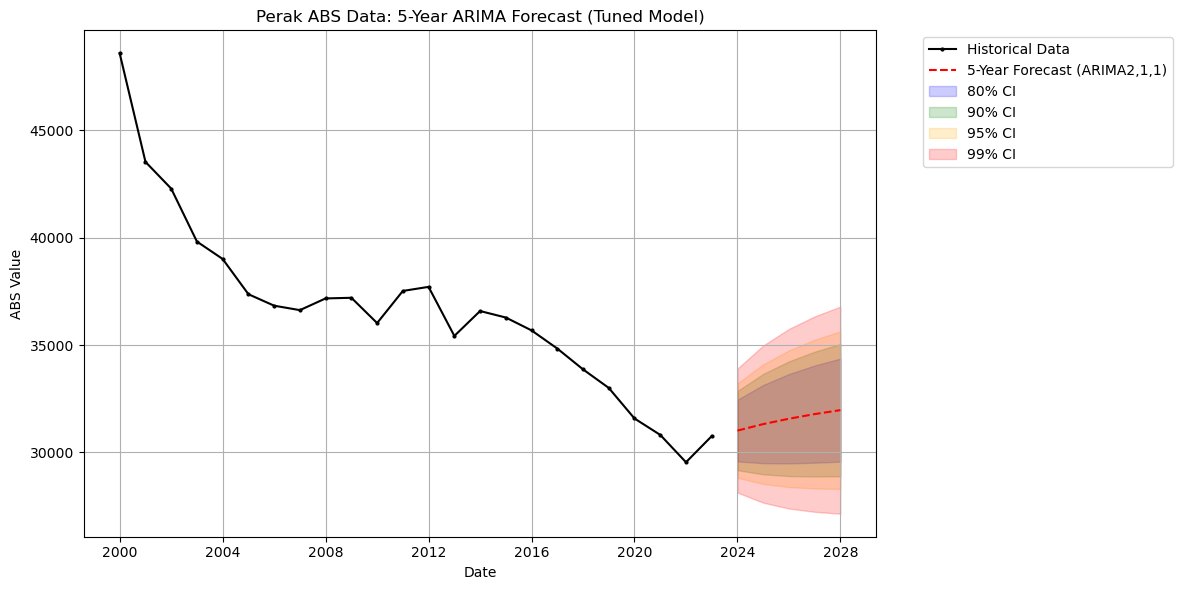

In [152]:
# Create plot for future forecast with TUNED ARIMA model
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(dates, abs_values, label='Historical Data', color='black', marker='.', markersize=4)

# Plot future forecast from TUNED model
plt.plot(future_dates, future_forecast_best, 
         label=f'5-Year Forecast (ARIMA{best_p},{best_d},{best_q})', 
         color='red', linestyle='--')

# Plot confidence intervals for future forecast from TUNED model
intervals = [0.2, 0.1, 0.05, 0.01]  # 80%, 90%, 95%, 99%
colors = ['blue', 'green', 'orange', 'red']
for alpha, color in zip(intervals, colors):
    ci = future_result_best.conf_int(alpha=alpha)
    plt.fill_between(future_dates,
                    ci[:, 0],  # Access array columns directly
                    ci[:, 1],
                    color=color, alpha=0.2,
                    label=f'{(1-alpha)*100:.0f}% CI')

# Formatting
plt.title(f'Perak ABS Data: {forecast_years}-Year ARIMA Forecast (Tuned Model)')
plt.xlabel('Date')
plt.ylabel('ABS Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [135]:
# Print future forecast values from best model
future_forecast_best_df = pd.DataFrame({
    'Date': future_dates,
    'Tuned Forecasted ABS': future_forecast_best
})
future_forecast_best_df

,Date,Tuned Forecasted ABS
0,2024-01-01,31017.471880
1,2025-01-01,31319.892009
2,2026-01-01,31570.426144
3,2027-01-01,31785.810639
4,2028-01-01,31970.137845


## Comparison ARIMA Model 

In [136]:
# Compare future forecast values from best model
compare_forecast_best_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted ABS': future_forecast,
    'Tuned Forecasted ABS': future_forecast_best
})
print("\n Forecast abs Comparison:")
compare_forecast_best_df


 Forecast abs Comparison:


,Date,Forecasted ABS,Tuned Forecasted ABS
0,2024-01-01,31354.527625,31017.471880
1,2025-01-01,31821.671989,31319.892009
2,2026-01-01,32188.109829,31570.426144
3,2027-01-01,32475.551359,31785.810639
4,2028-01-01,32701.026526,31970.137845


In [148]:
# Create a dictionary with the metrics
metrics_data = {
    'Metrics': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Original Model': [f"{perak_mae:.4f}", f"{perak_mse:.4f}", f"{perak_rmse:.4f}", f"{perak_mape:.2f}%"],
    'Tuned Model': [f"{perak_mae_best:.4f}", f"{perak_mse_best:.4f}", f"{perak_rmse_best:.4f}", f"{perak_mape_best:.2f}%"]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
print("\nARIMA Model Evaluation Metrics Comparison:")
metrics_df


ARIMA Model Evaluation Metrics Comparison:


,Metrics,Original Model,Tuned Model
0,MAE,941.4983,835.8528
1,MSE,1199789.3748,984452.7377
2,RMSE,5338.1436,992.1959
3,MAPE,2.65%,2.40%


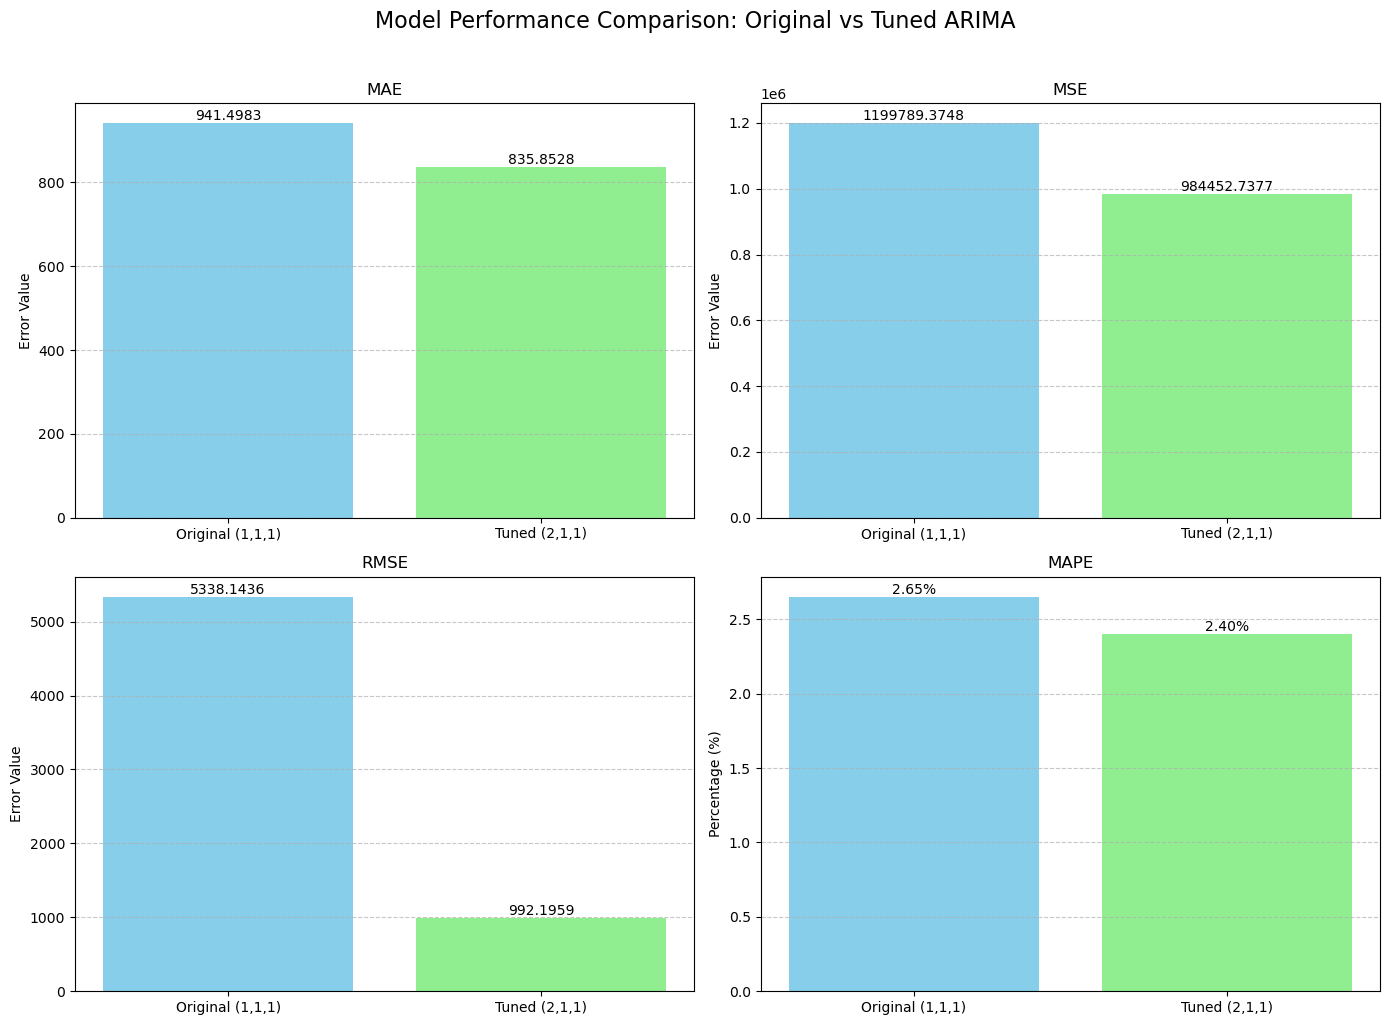

In [138]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Comparison: Original vs Tuned ARIMA', fontsize=16, y=1.02)

# Data for plotting
metrics = {
    'MAE': (perak_mae, perak_mae_best),
    'MSE': (perak_mse, perak_mse_best), 
    'RMSE': (perak_rmse, perak_rmse_best),
    'MAPE': (perak_mape, perak_mape_best)
}

# Plot each metric in its own subplot and annonate on top of the bar
for ax, (metric, values) in zip(axes.flatten(), metrics.items()):
    # Create bar plot
    bars = ax.bar(['Original (1,1,1)', f'Tuned ({best_p},{best_d},{best_q})'], 
                 values,
                 color=['skyblue', 'lightgreen'])
    
    ax.set_title(metric)
    if metric == 'MAPE':
        ax.set_ylabel('Percentage (%)')
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}%', ha='center', va='bottom')
    else:
        ax.set_ylabel('Error Value')
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.4f}', ha='center', va='bottom')
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Reference 

https://www.nature.com/articles/s41598-025-89905-1#:~:text=The%20linear%20SVM%20with%20boosted%20parameters%20demonstrated,of%2086%%2C%20and%20an%20F1%2Dscore%20of%2084%.&text=To%20date%2C%20the%20most%20effective%20ML%20algorithms,Boosting%20(XGBoost)%2C%20Catboost%2C%20and%20Random%20Forest%20algorithms.

https://open.dosm.gov.my/data-catalogue/births_annual_sex_ethnic_state

https://www.researchgate.net/publication/360183940_Application_of_machine_learning_algorithms_for_population_forecasting
https://www.ewadirect.com/proceedings/aemps/article/view/7293/pdf#:~:text=the%20training%20set%2C%20and%20we,We%20reviewed